# Linear Discriminant Analysis Example

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time

##### Load the data

In [3]:
data = pd.read_csv('../data/winequality.csv')
df = data.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


* Quality is our predictor column

In [11]:
np.unique(df['quality'], return_counts=True)

(array([3, 4, 5, 6, 7, 8], dtype=int64),
 array([ 10,  53, 681, 638, 199,  18], dtype=int64))

In [15]:
# Data is complete - no missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### Standardizing

In [18]:
scaler = StandardScaler()
x = df.iloc[:,:11].values # Columns 0-10
y = df.iloc[:,11].values # Column 11

In [23]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

##### Class means

In [25]:
# Precision = 1 for improved readability
np.set_printoptions(precision = 1)

mean_vectors = []
# i goes through wine qualities 3-8
for i in range(3,9):
    # Mean of all rows where wine quality (y) = i
    mean_vectors.append(np.mean(x_scaled[y==i], axis = 0))
    print('Mean Vector quality %s : %s\n'%(i, mean_vectors[i-3]))

Mean Vector quality 3 : [ 0.   2.  -0.5  0.1  0.7 -0.5 -0.7  0.4  0.6 -0.5 -0.4]

Mean Vector quality 4 : [-0.3  0.9 -0.5  0.1  0.1 -0.3 -0.3 -0.1  0.5 -0.4 -0.1]

Mean Vector quality 5 : [-0.1  0.3 -0.1 -0.   0.1  0.1  0.3  0.2 -0.  -0.2 -0.5]

Mean Vector quality 6 : [ 0.  -0.2  0.  -0.  -0.1 -0.  -0.2 -0.1  0.   0.1  0.2]

Mean Vector quality 7 : [ 0.3 -0.7  0.5  0.1 -0.2 -0.2 -0.3 -0.3 -0.1  0.5  1. ]

Mean Vector quality 8 : [ 0.1 -0.6  0.6  0.  -0.4 -0.2 -0.4 -0.8 -0.3  0.6  1.6]



* This means that for example wine quality 3 has a mean volatile acidity of 2 (2nd column) and a mean citric acid of -0.5 (3rd column)

## Calculating the Within- and Between-Class Scatter Matrices

##### Within-class scatter matrix

* Formula 1 - Calculate the covariance matrix for each separate quality grade

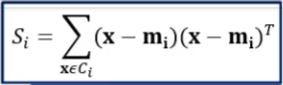

* Formula 2 - Sum these individual class matrices up

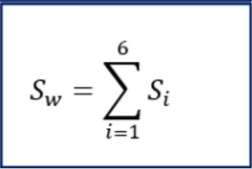

Source: https://learn.365datascience.com/courses/linear-algebra-and-feature-selection/

In [26]:
# 11x11 scatter matrix since we have 11 features
s_w = np.zeros((11,11))

# Iterate through 3 - 8 and the corresponding mean_vector
for i, mean_vector in zip(range(3,9), mean_vectors):
    # Make a blank scatter matrix for each class
    class_scatter_matrix = np.zeros((11,11))

    # Formula 1 above
    for row in x_scaled[y==i]:

        row, mean_vector = row.reshape(11,1), mean_vector.reshape(11,1)
        class_scatter_matrix += (row-mean_vector).dot((row-mean_vector).T)

    # Formula 2 above
    s_w += class_scatter_matrix

print('Within-class scatter matrix: \n', s_w)



Within-class scatter matrix: 
 [[ 1.6e+03 -3.3e+02  1.0e+03  1.8e+02  1.7e+02 -2.3e+02 -1.4e+02  1.1e+03
  -1.1e+03  2.4e+02 -2.0e+02]
 [-3.3e+02  1.3e+03 -7.4e+02  1.1e+01  1.7e+01 -3.9e+01  2.3e+01 -6.5e+01
   3.3e+02 -2.6e+02 -4.3e+01]
 [ 1.0e+03 -7.4e+02  1.5e+03  2.2e+02  3.7e+02 -7.7e+01  1.2e+02  6.5e+02
  -8.4e+02  4.1e+02 -7.7e-01]
 [ 1.8e+02  1.1e+01  2.2e+02  1.6e+03  9.3e+01  3.1e+02  3.3e+02  5.8e+02
  -1.4e+02  1.9e-01  4.6e+01]
 [ 1.7e+02  1.7e+01  3.7e+02  9.3e+01  1.6e+03 -4.9e+00  3.4e+01  2.8e+02
  -4.3e+02  6.5e+02 -2.5e+02]
 [-2.3e+02 -3.9e+01 -7.7e+01  3.1e+02 -4.9e+00  1.6e+03  1.0e+03 -6.5e+01
   1.2e+02  1.1e+02 -3.7e+01]
 [-1.4e+02  2.3e+01  1.2e+02  3.3e+02  3.4e+01  1.0e+03  1.5e+03  3.8e+01
  -9.3e+01  1.5e+02 -1.3e+02]
 [ 1.1e+03 -6.5e+01  6.5e+02  5.8e+02  2.8e+02 -6.5e+01  3.8e+01  1.5e+03
  -5.5e+02  3.1e+02 -6.3e+02]
 [-1.1e+03  3.3e+02 -8.4e+02 -1.4e+02 -4.3e+02  1.2e+02 -9.3e+01 -5.5e+02
   1.6e+03 -3.0e+02  3.5e+02]
 [ 2.4e+02 -2.6e+02  4.1e+02  1.9

##### Between-class scatter matrix

* Formula 3 - N(i) = quality count | m(i) = mean_vector | m = overall_mean 

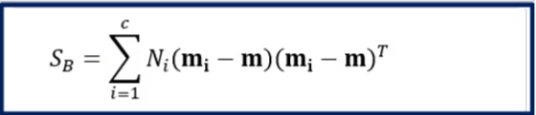

(11, 1)

In [37]:
# Overall mean
overall_mean = np.mean(x_scaled, axis = 0)
# between class scatter matrix blank
s_b = np.zeros((11,11))

# index i and mean_vector iterate through
for i, mean_vector in enumerate(mean_vectors):
    # quality count in each grade
    n = x_scaled[y==i+3].shape[0]
    
    # Reshaping from vectors (11,) to matrix (11,1)
    mean_vector, overall_mean = mean_vector.reshape(11,1), overall_mean.reshape(11,1)
    # Formula 3 above
    s_b += n*(mean_vector-overall_mean).dot((mean_vector-overall_mean).T)

print('Between-class scatter matrix: \n', s_b)



Between-class scatter matrix: 
 [[  30.9  -78.1   52.     6.4  -23.8  -12.6  -38.   -33.7  -13.6   52.6
    99.5]
 [ -78.1  256.6 -142.7   -7.9   81.    22.    99.4  100.7   42.5 -154.7
  -280.3]
 [  52.  -142.7   93.1   11.   -45.9  -20.2  -60.6  -63.1  -27.9   93.6
   176.5]
 [   6.4   -7.9   11.     5.3   -4.3   -7.    -8.1   -8.5   -1.5    8.7
    21.7]
 [ -23.8   81.   -45.9   -4.3   29.7   13.8   42.    40.8    9.4  -52.6
  -104.3]
 [ -12.6   22.   -20.2   -7.    13.8   23.5   46.4   30.1   -8.4  -27.7
   -73.7]
 [ -38.    99.4  -60.6   -8.1   42.    46.4  118.4   75.6  -13.2  -85.8
  -196.9]
 [ -33.7  100.7  -63.1   -8.5   40.8   30.1   75.6   64.5    5.5  -75.4
  -162. ]
 [ -13.6   42.5  -27.9   -1.5    9.4   -8.4  -13.2    5.5   21.5  -19.
   -20.8]
 [  52.6 -154.7   93.6    8.7  -52.6  -27.7  -85.8  -75.4  -19.   104.5
   204.9]
 [  99.5 -280.3  176.5   21.7 -104.3  -73.7 -196.9 -162.   -20.8  204.9
   426.4]]


##### Finding the eigenvectors and eigenvalues pairs

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(s_w).dot(s_b))